In [2]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# import data using pandas
df = pd.read_csv(r'D:/AI Engineer/EDA/Diwali_Sales_Analysis/Data/Diwali Sales Data.csv',encoding= 'unicode_escape')
# to avoid the encoding error, use unicode_escape
                   

In [4]:
df.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.shape

(11251, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


The columns Status and unnamed1 contains the null values so we will delete it 

In [7]:
# dropping unrelated columns
df.drop(['Status','unnamed1'],axis=1,inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [9]:
# checking nulls value
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

There are 12 nulls values in the Amount Column

In [10]:
pd.isnull(df).sum()/len(df) * 100

User_ID             0.000000
Cust_name           0.000000
Product_ID          0.000000
Gender              0.000000
Age Group           0.000000
Age                 0.000000
Marital_Status      0.000000
State               0.000000
Zone                0.000000
Occupation          0.000000
Product_Category    0.000000
Orders              0.000000
Amount              0.106657
dtype: float64

The Amount columns contains the 0.10% null values if we delete these rows so it will not impact the data that much, so we will delete these rows

In [11]:
# deleting the nulls values from the dataset
df.dropna(inplace = True)

In [12]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

so, here nulls values are deleted

In [13]:
# change the datatype of amount to int
df['Amount'] = df['Amount'].astype('int')

In [14]:
df['Amount'].dtypes

dtype('int32')

**Exploratory Data Analysis**

**Gender**

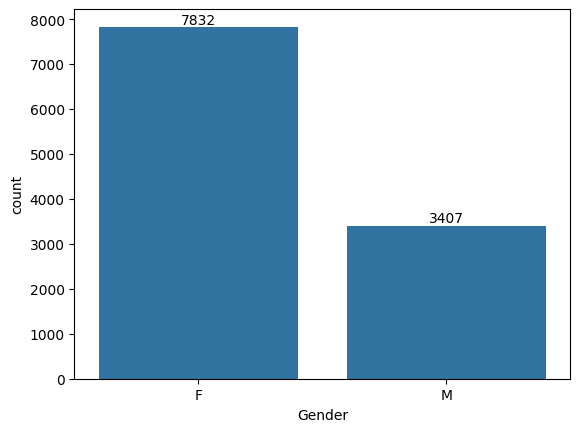

In [15]:
ax = sns.countplot(x='Gender',data=df)

for bars in ax.containers:
    ax.bar_label(bars)

In [16]:
# Calculating thr percentage of amount spend by the females
df[df['Gender']== 'F']['Amount'].sum() / df.Amount.sum() * 100

69.96372930266563

<Axes: xlabel='Gender', ylabel='Amount'>

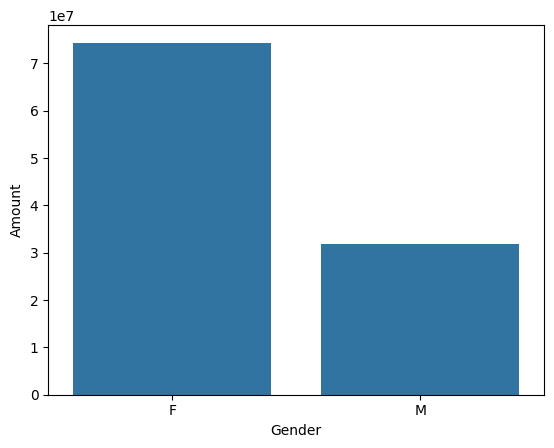

In [18]:
sales = df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data = sales)


**The Number of the Female Buyers are greater then the a male buyers and the purchacing power of the female buyers is also greater then the male buyers.**

**Age**

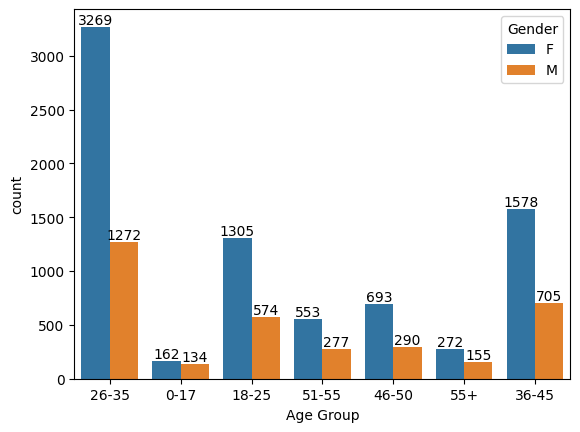

In [19]:
bx = sns.countplot(x="Age Group",data = df,hue='Gender')
for i in bx.containers:
    bx.bar_label(i) 

<Axes: xlabel='Age Group', ylabel='Amount'>

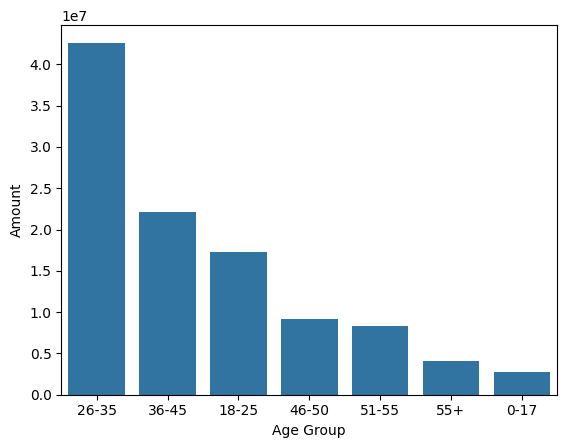

In [20]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' ,ascending  = False)
sns.barplot(x='Age Group',y='Amount',data = sales_age)

In [26]:
# Calculating the percentage of the amount spend by the Age Group 26-35
df[df['Age Group'] == '26-35']['Amount'].sum()/df.Amount.sum() * 100

40.107097725008174

**The most of the busyer are lies in the age group 26-35 in which female buyers are large in numbers**

**State**

<Axes: xlabel='State', ylabel='Orders'>

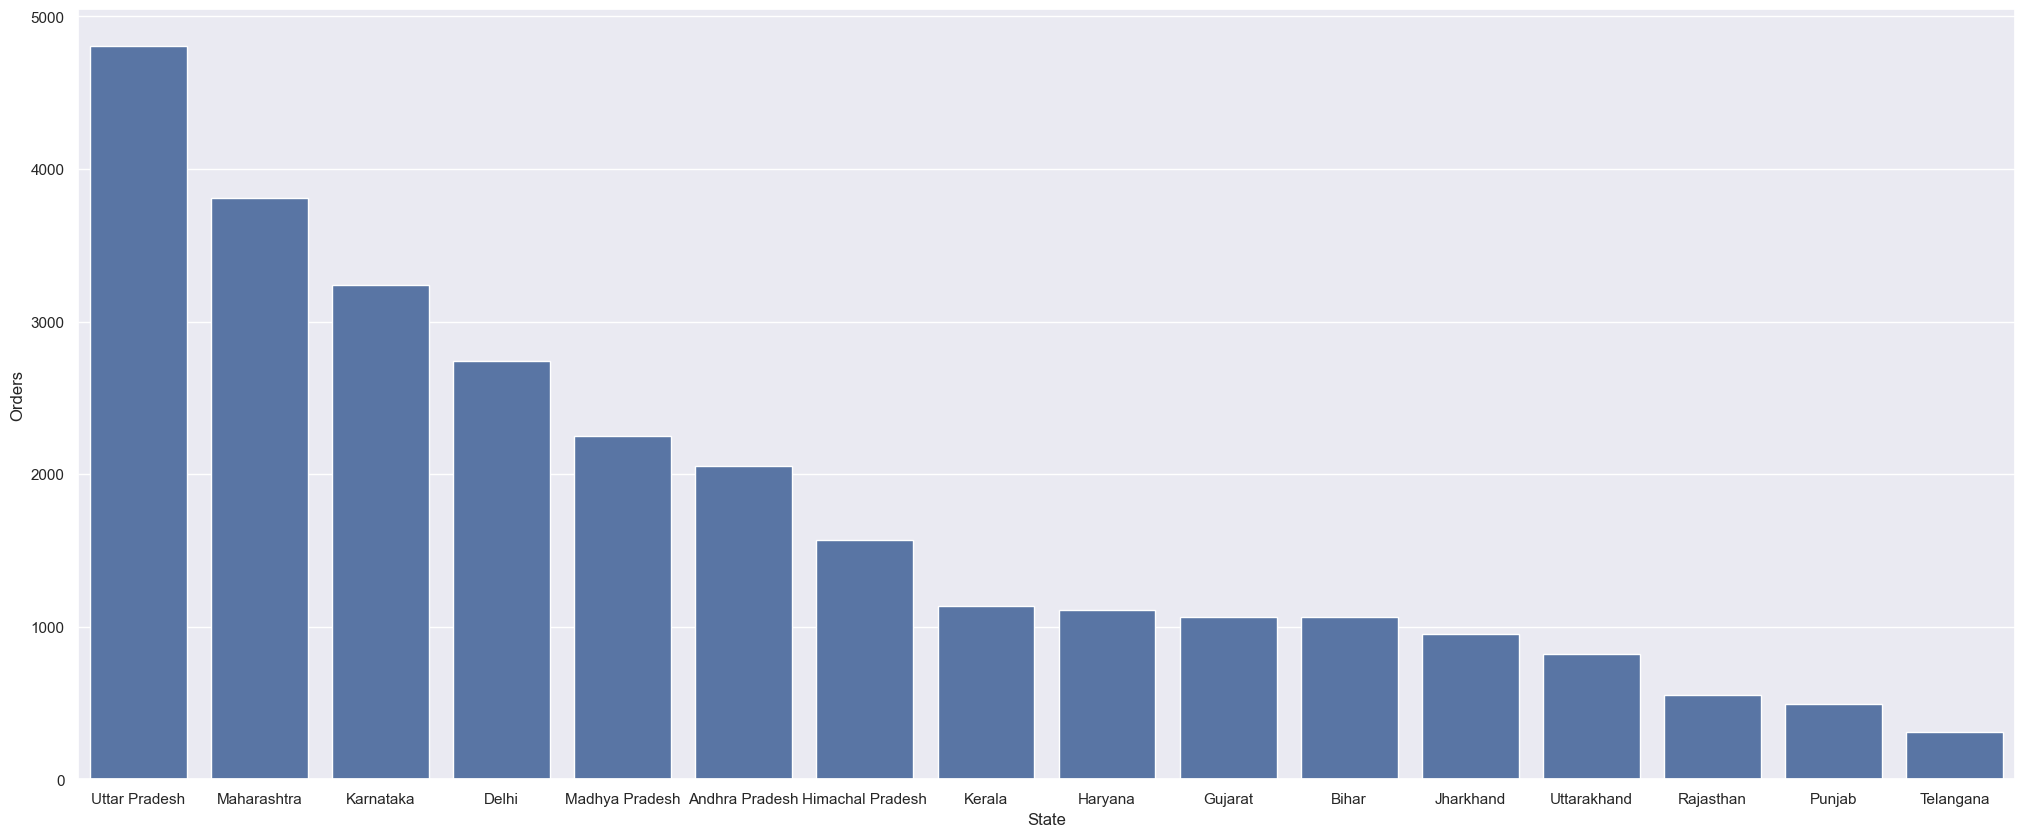

In [22]:
sales_state = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by='Orders', ascending = False)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='State',y='Orders',data= sales_state)

In [28]:
# Calculating the percentage of total sells in the telangana state
df[df['State'].isin(['Telangana'])]['Orders'].sum() / df.Orders.sum() * 100


1.1150423501661841

<Axes: xlabel='State', ylabel='Amount'>

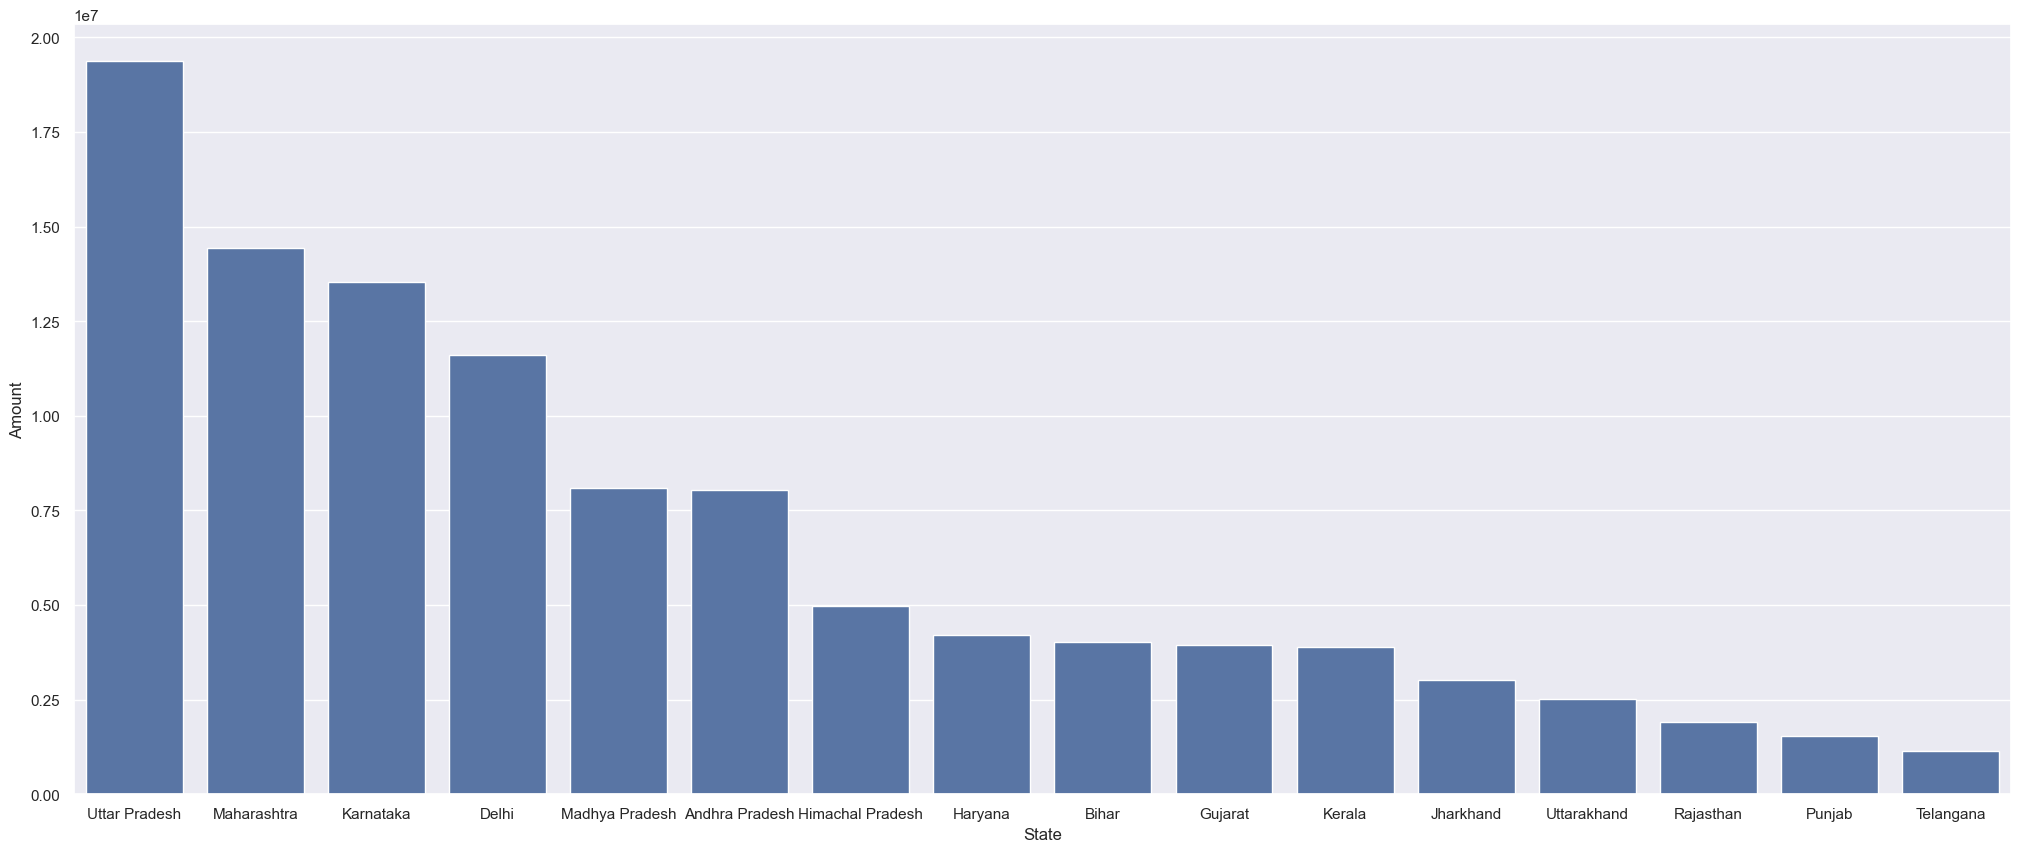

In [27]:
sales_state = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by='Amount', ascending = False)
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='State',y='Amount',data= sales_state)

**The most of the orders are getting from the states Uttar Pradesh, Maharashtra and Karnataka and the state telengana has a lowest order**

**Marital Status**

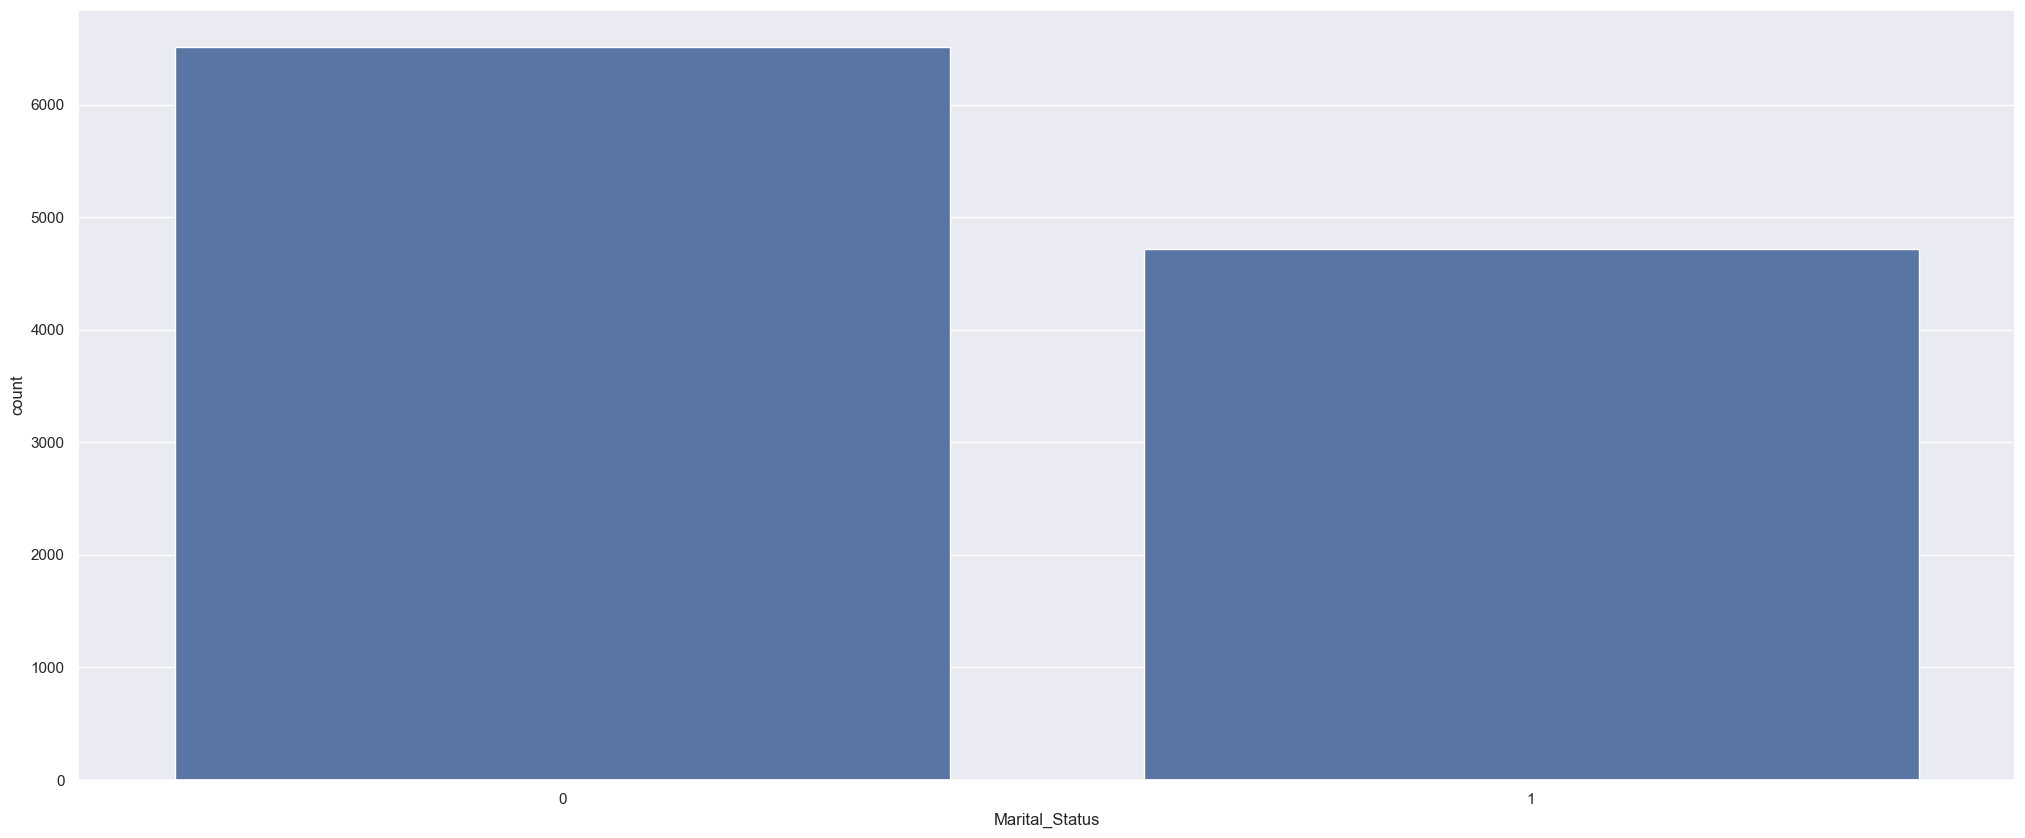

In [29]:
sns.countplot(x="Marital_Status",data=df)
sns.set(rc={'figure.figsize':(10,5)})

<Axes: xlabel='Marital_Status', ylabel='Amount'>

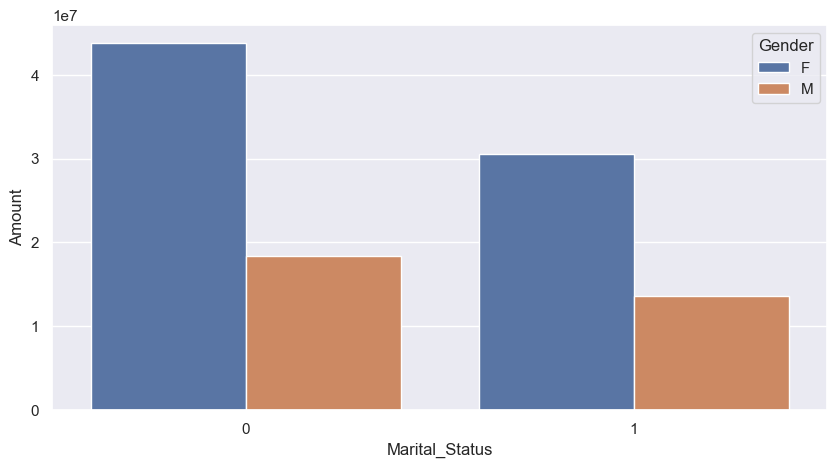

In [30]:
sales_m = df.groupby(['Marital_Status','Gender'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending = False)
sns.barplot(x='Marital_Status',y='Amount',data=sales_m,hue='Gender')

In [32]:
# Calculating the percentage of the total sells for the married women
df[(df['Marital_Status'] == 0) & (df['Gender'] == 'F')]['Amount'].sum() / df[df['Marital_Status'] == 0]['Amount'].sum() * 100

70.48108708672126

**Most of the Buyers are married women whose purchasing power is high**

**Occupation**

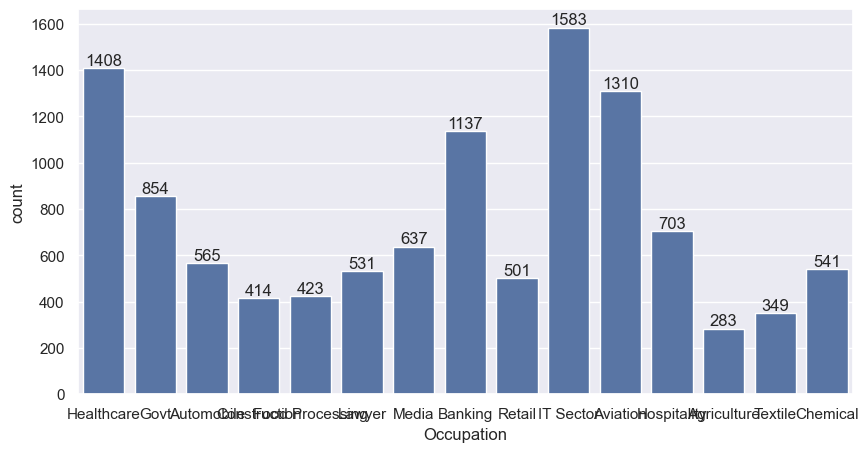

In [33]:
x = sns.countplot(x='Occupation',data=df)
sns.set(rc={'figure.figsize':(25,14)})
for i in x.containers:
    x.bar_label(i)

<Axes: xlabel='Occupation', ylabel='Amount'>

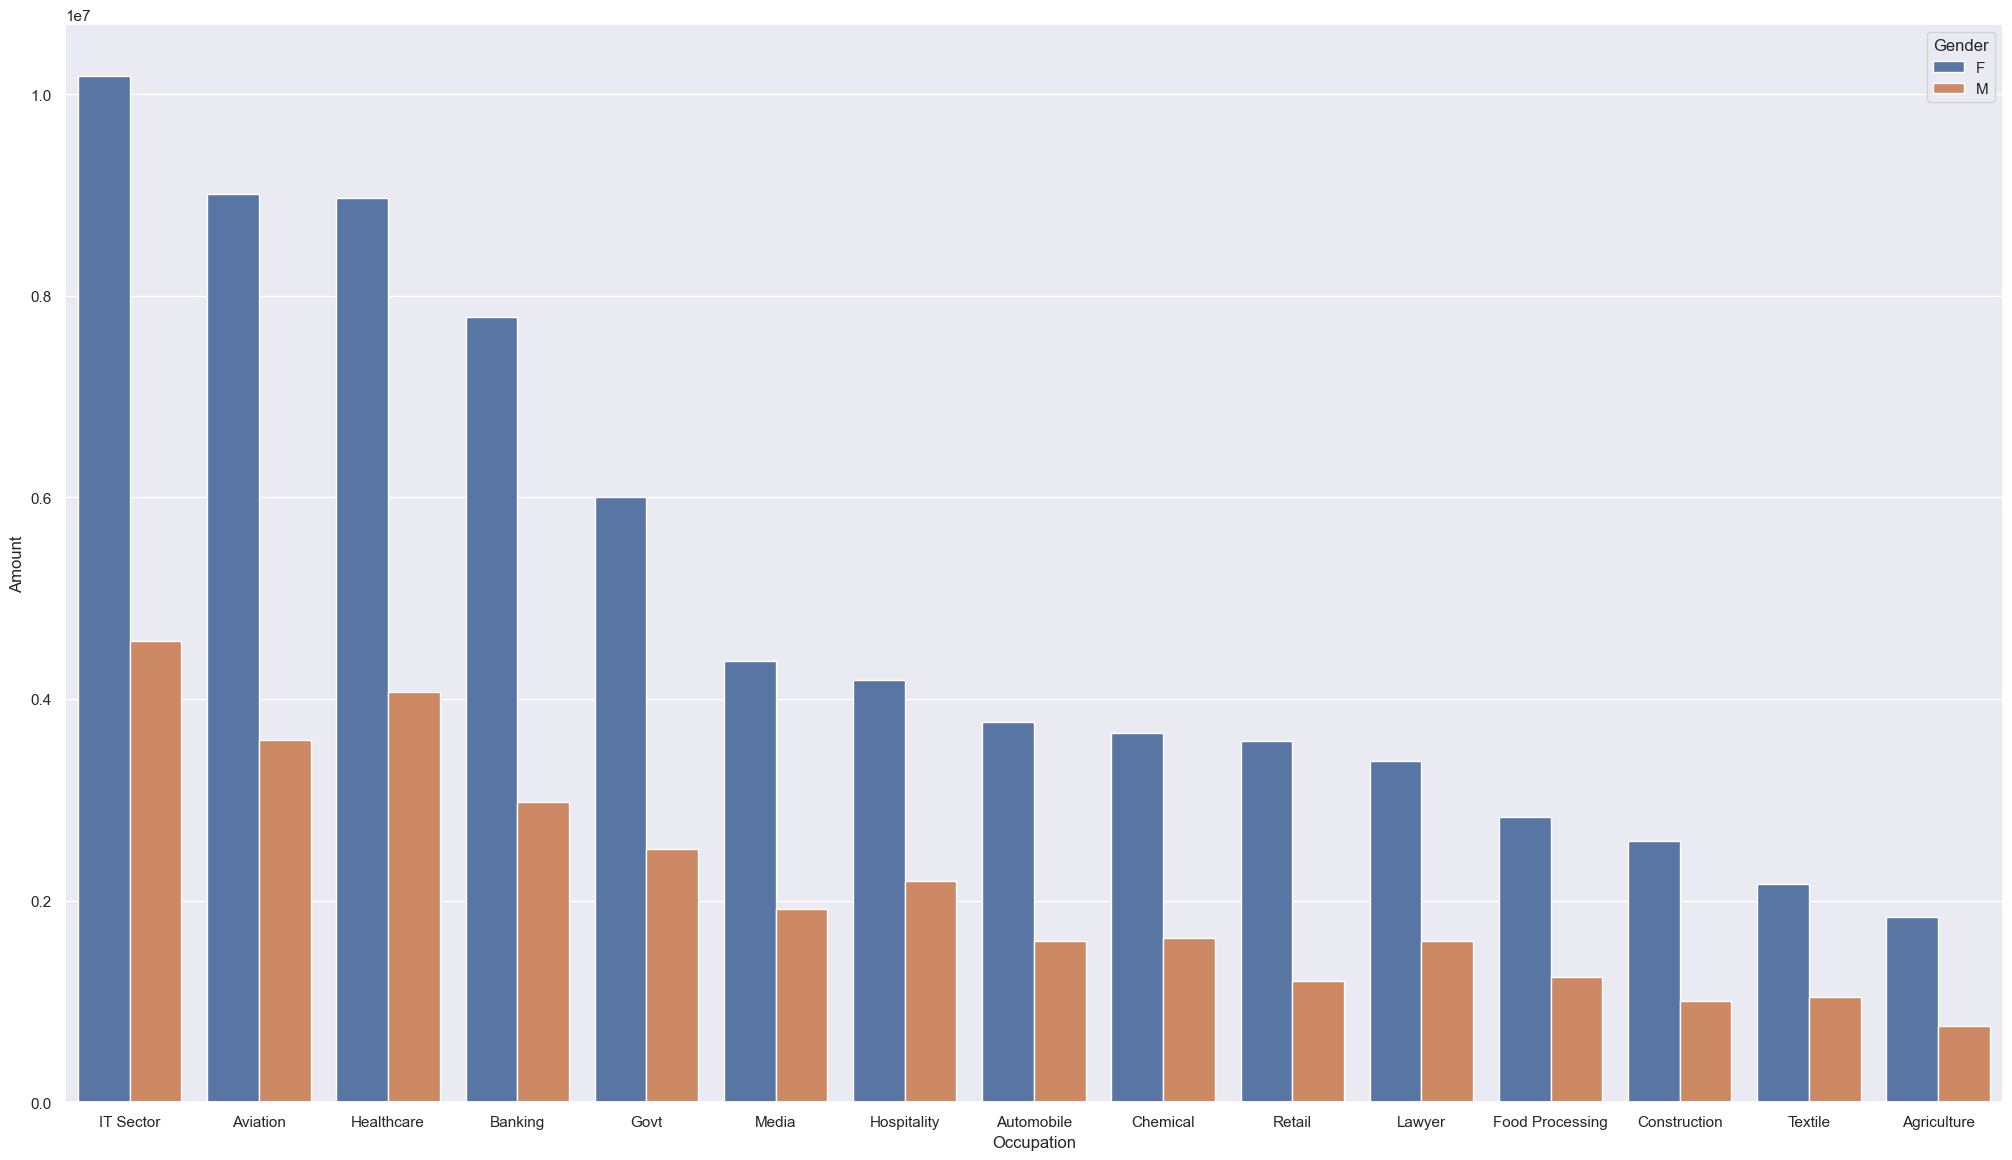

In [34]:
sales_o = df.groupby(['Occupation','Gender'],as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(data = sales_o,x='Occupation',y='Amount',hue= 'Gender')

In [36]:
# Calculating the percentage of sell for the occupation of Aggriculture
df[df['Occupation'] == 'Agriculture']['Amount'].sum() / df['Amount'].sum() * 100

2.4405724775400275

In [ ]:
df.head()

**Most of the buyers are from the it sector in which females have spend more amount and lowest buyers are from agriculture sector**

**Product Category**

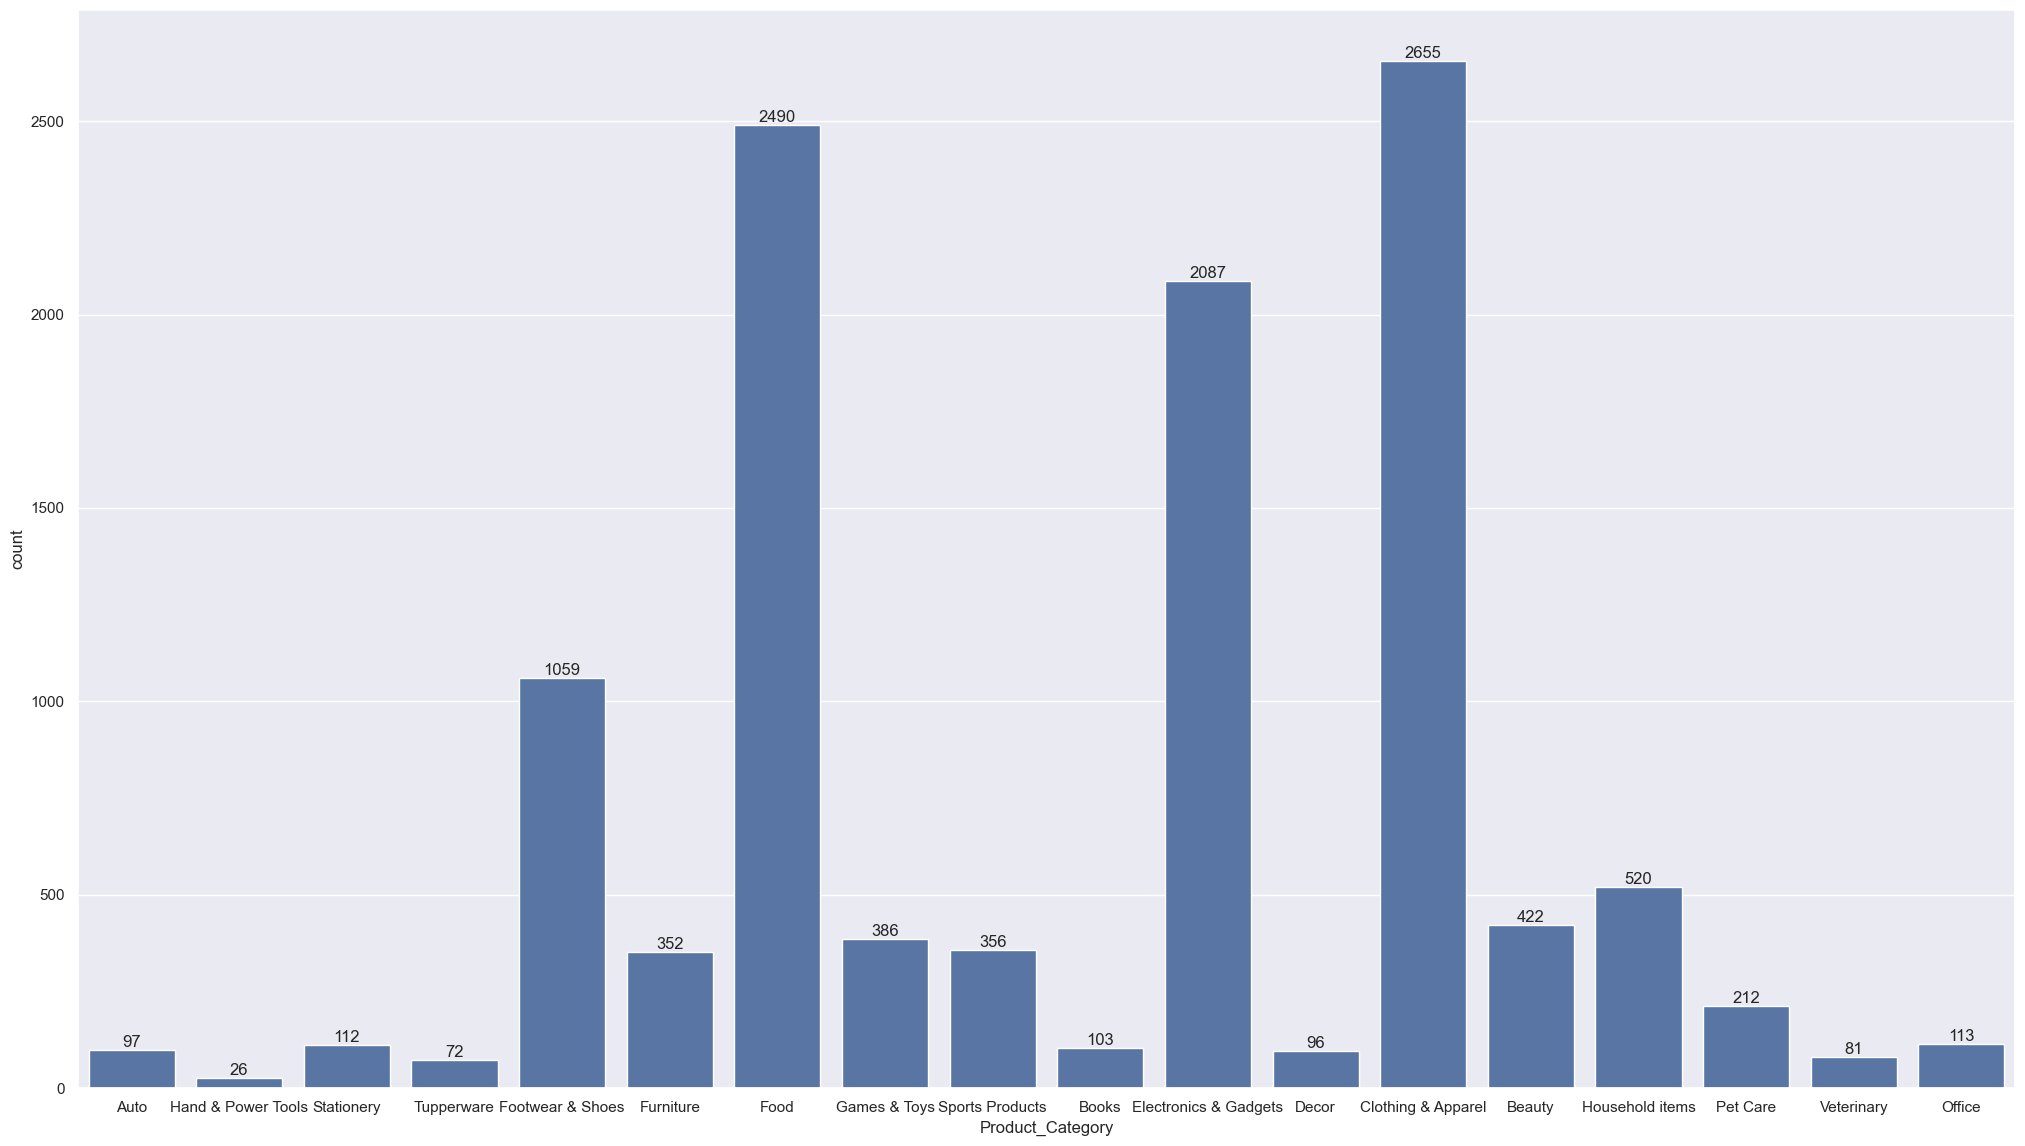

In [37]:
b = sns.countplot(x='Product_Category',data = df)

for i in b.containers:
    b.bar_label(i)


most of the sales are from the clothing&Apparence , Food and electronic 

<Axes: xlabel='Product_Category', ylabel='Amount'>

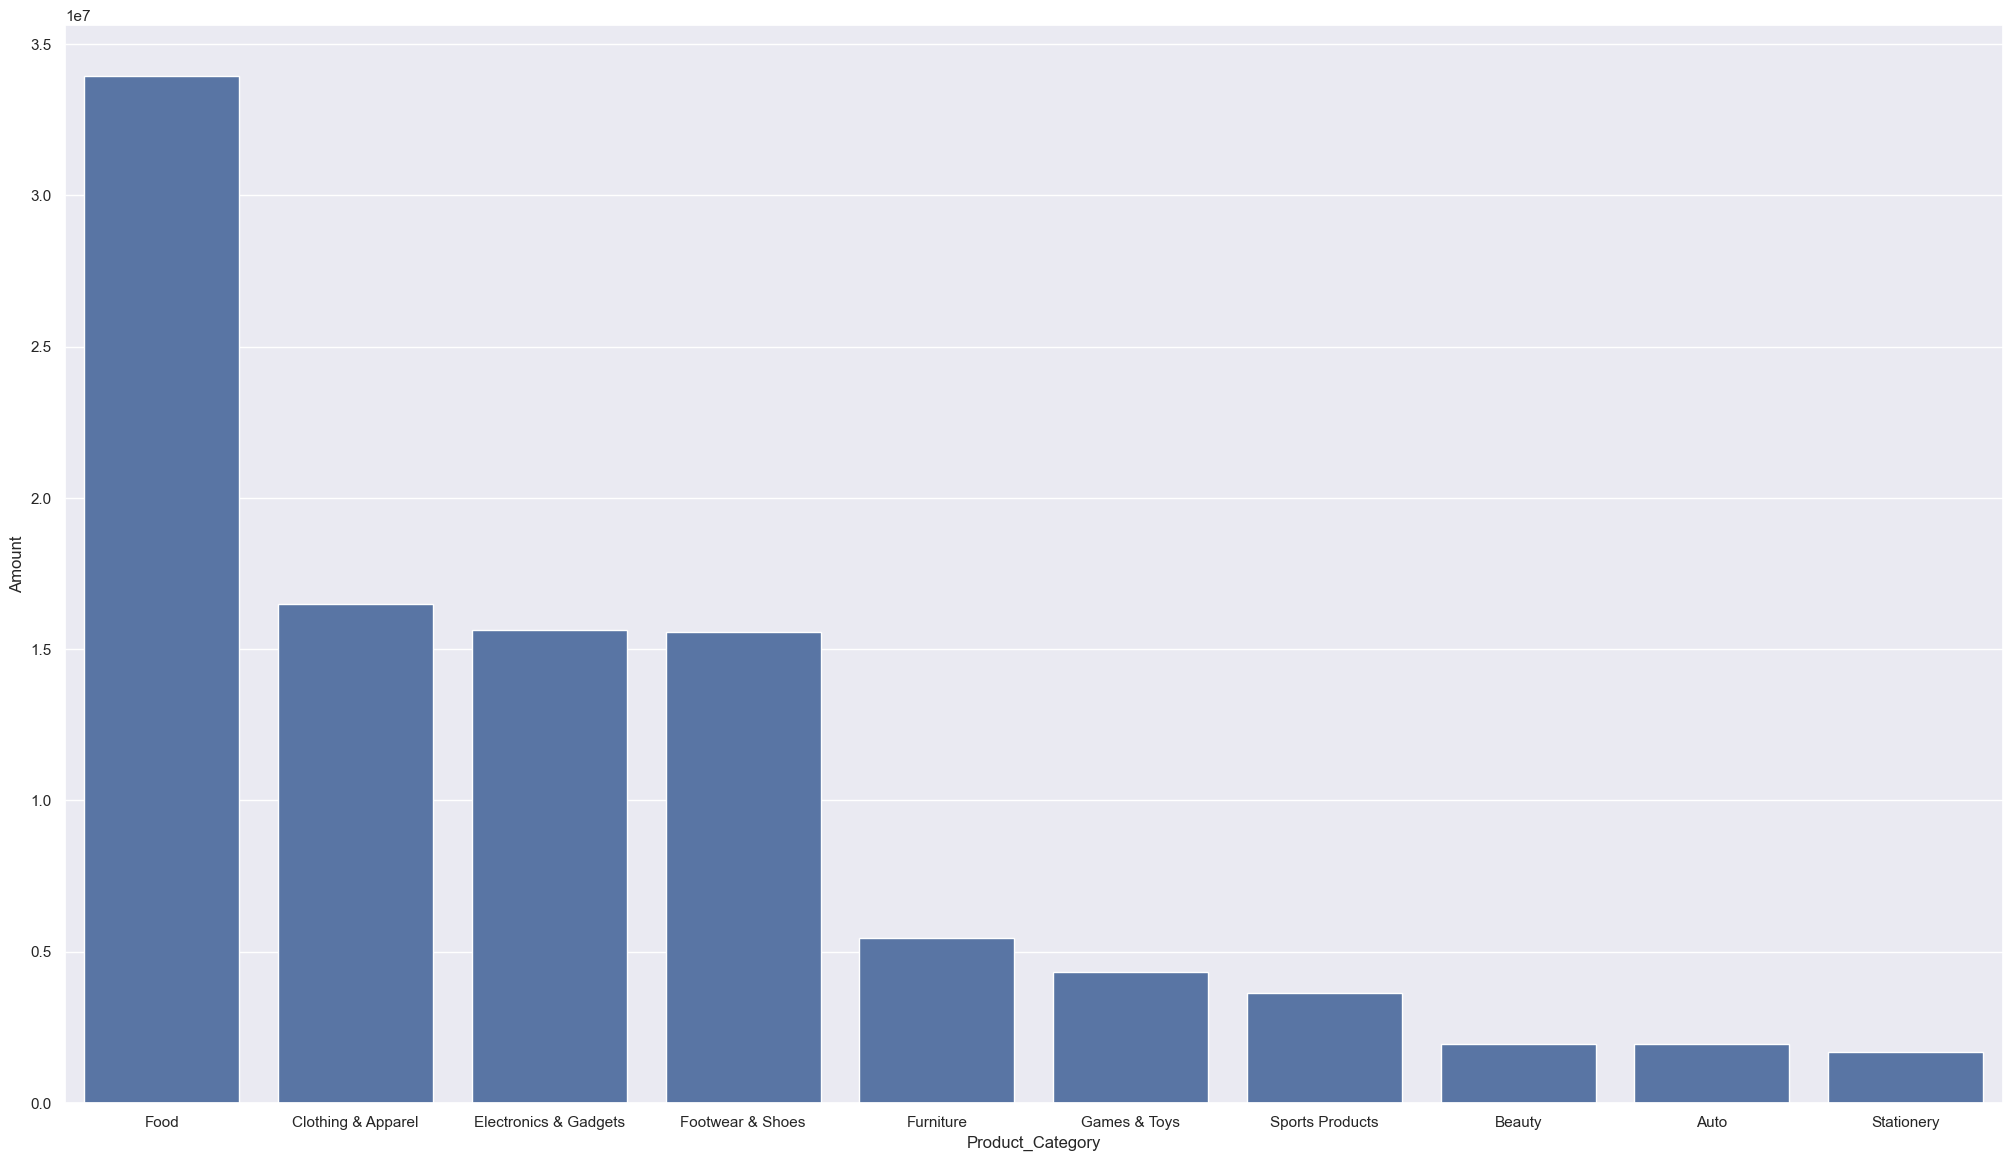

In [38]:
sales_p = df.groupby('Product_Category',as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False).head(10)

sns.barplot(x='Product_Category',y='Amount',data=sales_p)

In [40]:
# Calculating the percentage of the sells for the Product Caregory Food
df[df['Product_Category'].isin(['Food'])]['Amount'].sum() / df.Amount.sum() * 100


31.938034052025028

In [41]:
# Calculating the percentage of the sells for the Product Caregory Clothing & Apparel
df[df['Product_Category'].isin(['Clothing & Apparel'])]['Amount'].sum() / df.Amount.sum() * 100

15.524851031955283

In [42]:
# Calculating the percentage of the sells for the Product Caregory Electronics & Gadgets
df[df['Product_Category'].isin(['Electronics & Gadgets'])]['Amount'].sum() / df.Amount.sum() * 100

14.723740464733599

**Most the Amount spend by the food clothing and electronics respectively**

<Axes: xlabel='Product_ID', ylabel='Orders'>

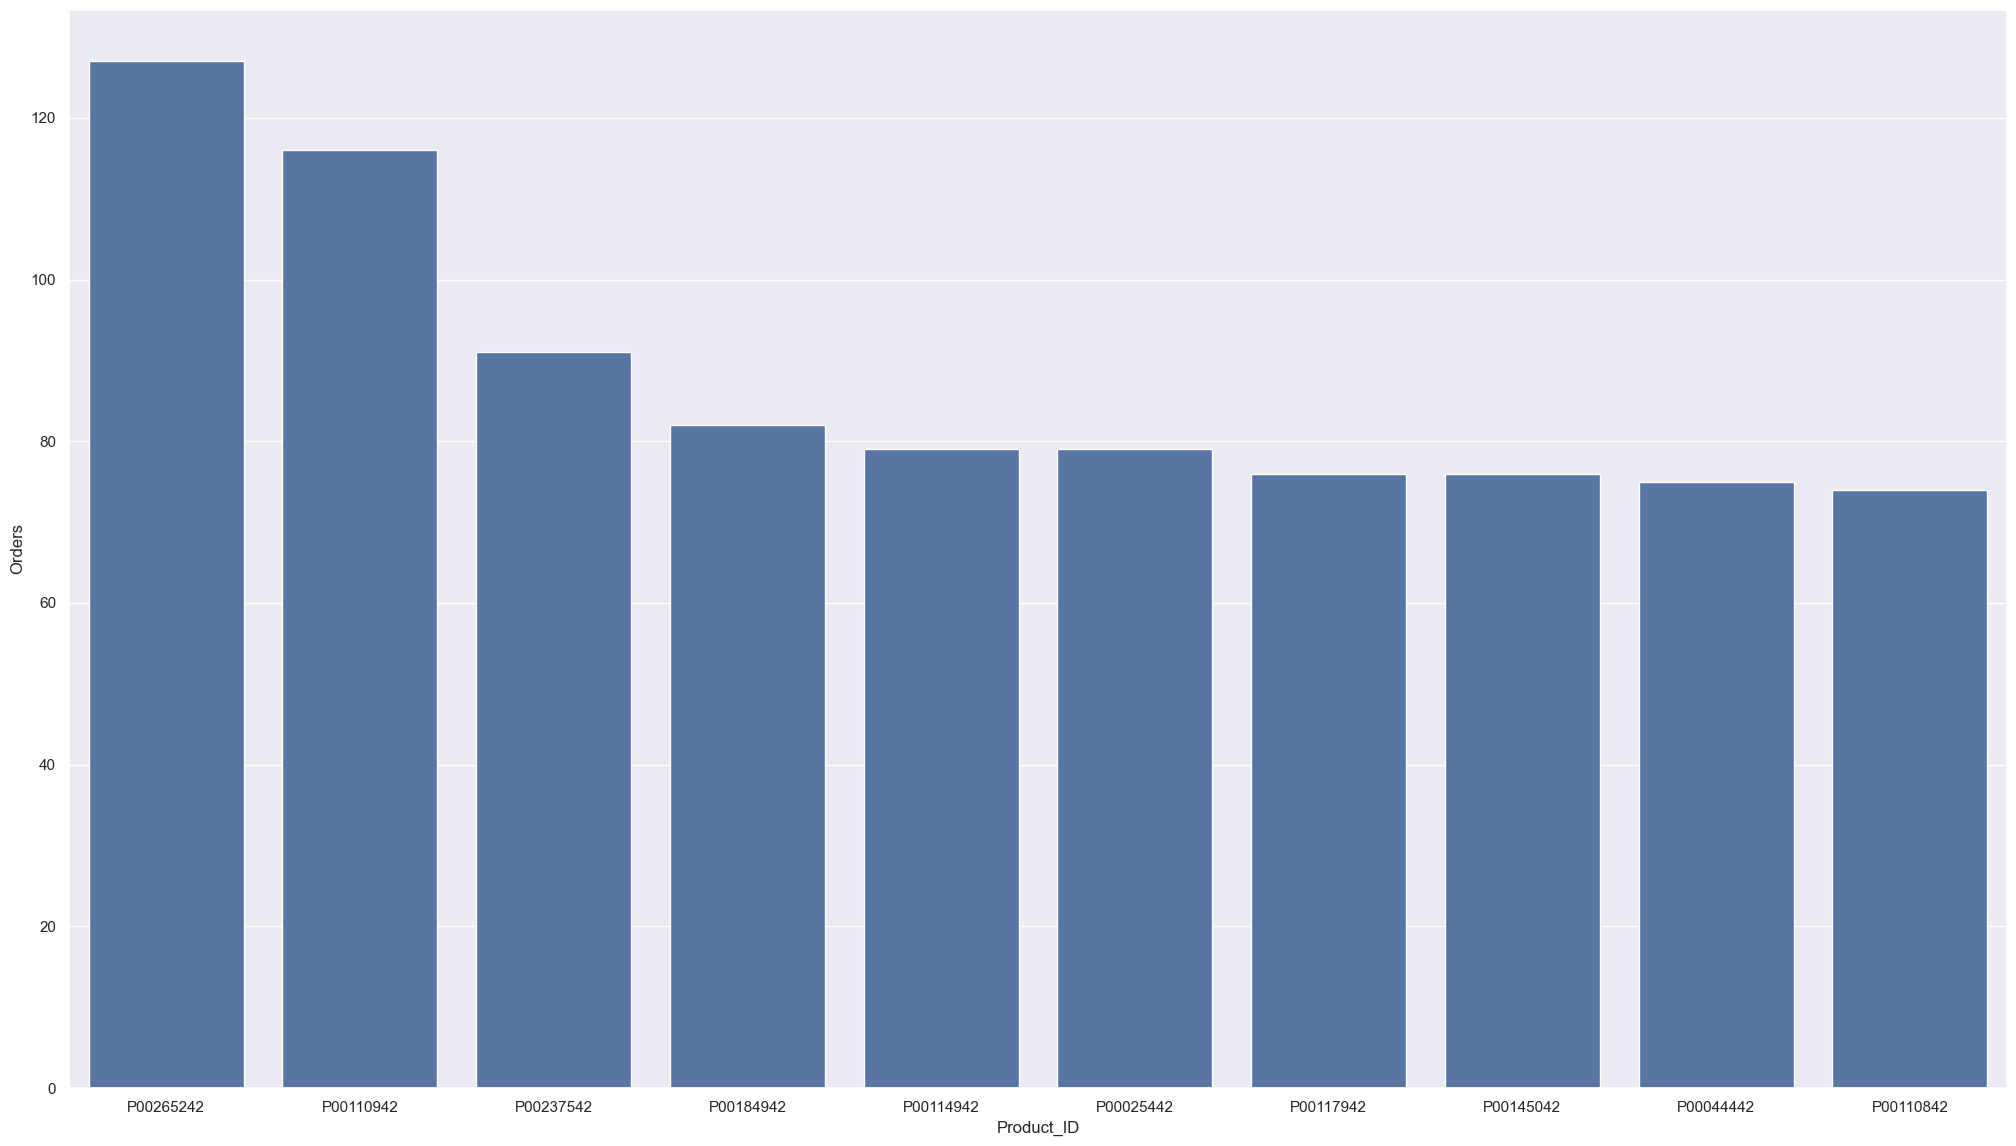

In [43]:
# Find the Top 10 Products
top10 = df.groupby('Product_ID',as_index=False)['Orders'].sum().sort_values(by='Orders',ascending = False).head(10)

sns.barplot(x='Product_ID',y='Orders',data=top10)

**Top 10 Sellings products are P00265242,P00110942,P00237542,P00184942,P00114942,P000025442,P00117942,P00145042,P00044442,P00110842**

# Insights

1. The number of female buyers is greater than male buyers, contributing approximately **69.68%** of the total buyer base. Additionally, the purchasing power of female buyers is higher, accounting for about **69%** of the total purchase amount.

2. The majority of buyers fall within the 26–35 age group, where female buyers make up a significant portion, representing **71.98%** of the total buyers in this age bracket.

3. Most of the orders are received from the states of Uttar Pradesh, Maharashtra, and Karnataka, which collectively contribute around **42.37%** of total orders. In contrast, Telangana records the lowest number of orders at **1.11%**.

4. A large segment of the buyers are married women, who demonstrate higher purchasing power, accounting for about **70.48%** of the total sales.

5. The IT sector has the highest number of buyers, particularly female buyers who spend more on average. Conversely, the agriculture sector shows the lowest buyer count and purchase volume, with only **2.44%** contribution to overall sales.

6. The top spending categories are Food, Clothing, and Electronics, contributing **31.93%**, **15.52%**, and **14.72%** of the total purchase amount respectively.

7. The top 10 best-selling products are:
P00265242, P00110942, P00237542, P00184942, P00114942, P000025442, P00117942, P00145042, P00044442, and P00110842.

**Note:- More Insights can be found.**